<a href="https://colab.research.google.com/github/teszerrakt/multi-layer-perceptron/blob/main/MLP_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Image Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = os.path.join('/content/drive/MyDrive/Machine Learning/MLP - Flower Dataset')
classes = os.listdir(data_path)

In [ ]:
count = 0
for c in classes:
    count = count + len(os.listdir(data_path + '/' + c))
print(count)
print(classes)

300
['tulip', 'daisy', 'rose']


## Image Data Visualization

### Tulip
Show 5 tulip pictures from the dataset

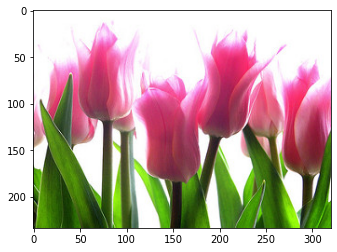

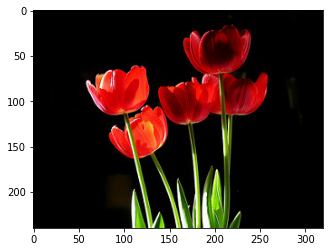

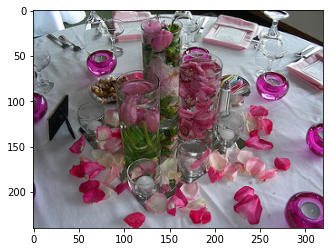

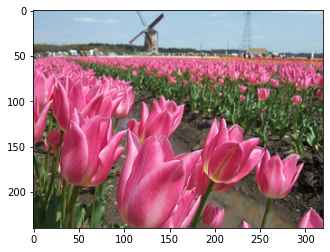

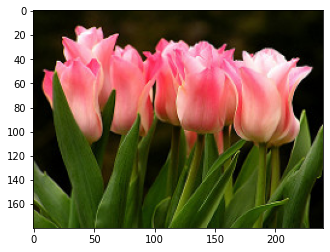

In [ ]:
i = 0
for filename in os.listdir(data_path + '/' + 'tulip'):
    img = mpimg.imread(data_path + '/' + 'tulip' + '/' + filename)
    imgplot = plt.imshow(img)
    plt.show()
    i += 1
    if (i == 5):
        break

### Daisy
Show 5 daisy pictures from the dataset

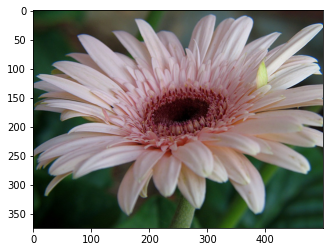

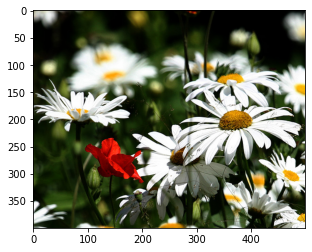

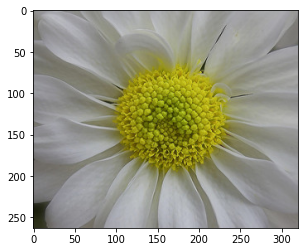

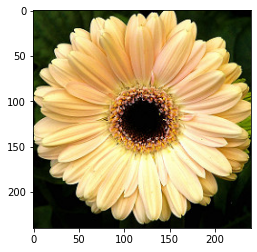

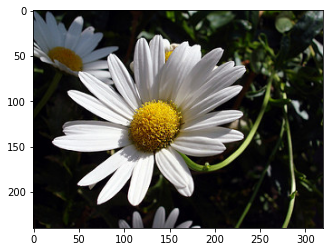

In [ ]:
i = 0
for filename in os.listdir(data_path + '/' + 'daisy'):
    img = mpimg.imread(data_path + '/' + 'daisy' + '/' + filename)
    imgplot = plt.imshow(img)
    plt.show()
    i += 1
    if (i == 5):
        break

### Rose
Show 5 rose pictures from the dataset

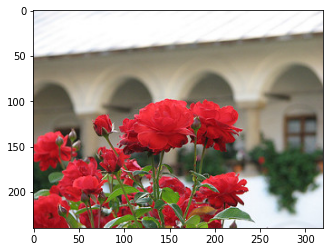

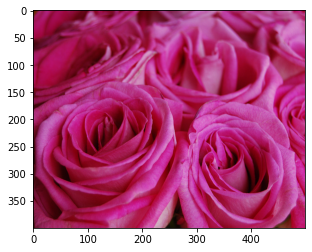

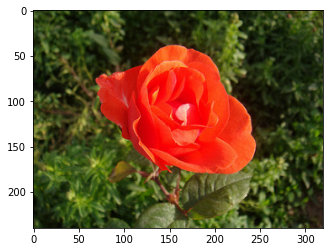

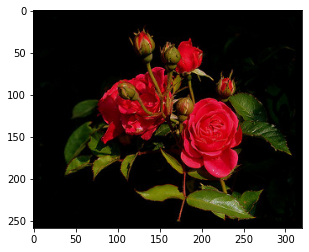

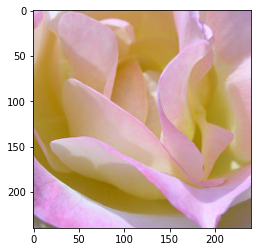

In [ ]:
i = 0
for filename in os.listdir(data_path + '/' + 'rose'):
    img = mpimg.imread(data_path + '/' + 'rose' + '/' + filename)
    imgplot = plt.imshow(img)
    plt.show()
    i += 1
    if (i == 5):
        break

# Load Images

In [ ]:
from matplotlib import image
import cv2

loaded_images = list()

for c in classes:
    for filename in os.listdir(data_path + '/' + c):
        # load image
        img_data = image.imread(data_path + '/' + c + '/' + filename)
        # convert to greyscale
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
        # resize all images to 320x240
        img_data = cv2.resize(img_data, (320,240), interpolation = cv2.INTER_AREA)
        # flatten image array data to 1d array
        img_data = img_data.flatten()
        # assign class names to numbers
        if c == 'rose':
          i = 0
        elif c == 'tulip':
          i = 1
        elif c == 'daisy':
          i = 2
        # append class number to the very last index of the img_data array
        img_data = np.append(img_data, i)
        # append image data to image list
        loaded_images.append(img_data)
        print('> loaded %s %s' % (filename, img_data.shape))

> loaded 112428919_f0c5ad7d9d_n.jpg (76801,)
> loaded 133858239_3eaa8a91fd_n.jpg (76801,)
> loaded 164578909_51f245d3fa_n.jpg (76801,)
> loaded 130685040_3c2fcec63e_n.jpg (76801,)
> loaded 112651128_7b5d39a346_m.jpg (76801,)
> loaded 113902743_8f537f769b_n.jpg (76801,)
> loaded 116343334_9cb4acdc57_n.jpg (76801,)
> loaded 130685347_afbffe3afa_n.jpg (76801,)
> loaded 11746080_963537acdc.jpg (76801,)
> loaded 132538273_335240fe5b_n.jpg (76801,)
> loaded 112951022_4892b1348b_n.jpg (76801,)
> loaded 11746367_d23a35b085_n.jpg (76801,)
> loaded 134143359_71fa8dd9a4.jpg (76801,)
> loaded 112334842_3ecf7585dd.jpg (76801,)
> loaded 113291410_1bdc718ed8_n.jpg (76801,)
> loaded 112428665_d8f3632f36_n.jpg (76801,)
> loaded 142235914_5419ff8a4a.jpg (76801,)
> loaded 133960364_d87f883c15_n.jpg (76801,)
> loaded 113960470_38fab8f2fb_m.jpg (76801,)
> loaded 112951086_150a59d499_n.jpg (76801,)
> loaded 11746276_de3dec8201.jpg (76801,)
> loaded 110147301_ad921e2828.jpg (76801,)
> loaded 10791227_7168491

In [ ]:
#Print the first image and its class
print(loaded_images[0])

[255 255 255 ... 112 112   1]


# Normalize Dataset

In [ ]:
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [ ]:
# normalize train data variables
minmax = dataset_minmax(loaded_images)
normalize_dataset(loaded_images, minmax)

## Shuffle and split into 80% train set and 20% test set

In [ ]:
import random
random.shuffle(loaded_images)
train_data = loaded_images[:int((len(loaded_images)+1)*.80)]
test_data = loaded_images[int((len(loaded_images)+1)*.80):]

# Backpropagation

## Initialize Weight and Bias

In [ ]:
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

## Feedforward

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]
    return activation

In [ ]:
from math import exp

# Transfer neuron activation
# We use sigmoid function
def transfer(activation):
    return 1.0/(1.0 + exp(-activation))

In [ ]:
# Forward propagate input to a network input
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

## Backward

In [ ]:
# Calculate the derivative of a neuron output
# Derived from sigmoid function
def transfer_derivative(output):
    return output * (1.0 - output)

In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

## Train Network

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    error_list = list()
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        error_list.append(sum_error)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return error_list

## Prediction

In [ ]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

## Backpropagation with SGD

In [ ]:
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(prediction)

## Accuracy

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

## Evaluating Accuracy

In [ ]:
def evaluate_accuracy(dataset, network):
    actual = [row[-1] for row in dataset]
    predictions = list()
    for row in dataset:
        prediction = predict(network, row)
        predictions.append(prediction)
    
    accuracy = accuracy_metric(actual, predictions)
    return accuracy

# Training

## Train with 0.1 learning rate

In [ ]:
network2 = initialize_network(n_inputs, 1, n_outputs)
train2 = train_network(network2, train_data, 0.1, 50, n_outputs)
for layer in network2:
    print(layer)
 
train_acc2 = evaluate_accuracy(train_data, network2)
test_acc2 = evaluate_accuracy(test_data, network2)

>epoch=0, lrate=0.100, error=190.978
>epoch=1, lrate=0.100, error=161.711
>epoch=2, lrate=0.100, error=161.223
>epoch=3, lrate=0.100, error=161.126
>epoch=4, lrate=0.100, error=161.045
>epoch=5, lrate=0.100, error=160.967
>epoch=6, lrate=0.100, error=160.890
>epoch=7, lrate=0.100, error=160.813
>epoch=8, lrate=0.100, error=160.736
>epoch=9, lrate=0.100, error=160.659
>epoch=10, lrate=0.100, error=160.582
>epoch=11, lrate=0.100, error=160.504
>epoch=12, lrate=0.100, error=160.426
>epoch=13, lrate=0.100, error=160.347
>epoch=14, lrate=0.100, error=160.268
>epoch=15, lrate=0.100, error=160.188
>epoch=16, lrate=0.100, error=160.109
>epoch=17, lrate=0.100, error=160.029
>epoch=18, lrate=0.100, error=159.950
>epoch=19, lrate=0.100, error=159.871
>epoch=20, lrate=0.100, error=159.794
>epoch=21, lrate=0.100, error=159.718
>epoch=22, lrate=0.100, error=159.643
>epoch=23, lrate=0.100, error=159.571
>epoch=24, lrate=0.100, error=159.502
>epoch=25, lrate=0.100, error=159.435
>epoch=26, lrate=0.100

In [ ]:
print('Train accuracy: ', train_acc2, '%')
print('Test accuracy: ', test_acc2, '%')

Train accuracy:  40.0 %
Test accuracy:  43.333333333333336 %


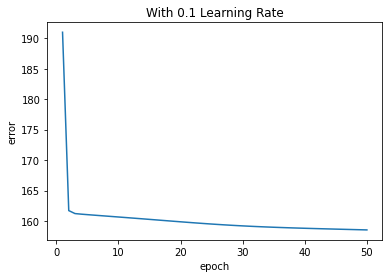

In [ ]:
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

plt.plot(epochs,train2)
  
plt.xlabel('epoch')
plt.ylabel('error')
  
plt.title('With 0.1 Learning Rate')
  
plt.show()

## Train with 0.8 learning rate

In [ ]:
n_inputs = len(train_data[0]) - 1
n_outputs = len(set([row[-1] for row in train_data]))
network1 = initialize_network(n_inputs, 1, n_outputs)
train1 = train_network(network1, train_data, 0.8, 50, n_outputs)

train_acc1 = evaluate_accuracy(train_data, network1)
test_acc1 = evaluate_accuracy(test_data, network1)

>epoch=0, lrate=0.800, error=168.995
>epoch=1, lrate=0.800, error=165.876
>epoch=2, lrate=0.800, error=165.271
>epoch=3, lrate=0.800, error=164.952
>epoch=4, lrate=0.800, error=164.780
>epoch=5, lrate=0.800, error=164.636
>epoch=6, lrate=0.800, error=164.489
>epoch=7, lrate=0.800, error=164.338
>epoch=8, lrate=0.800, error=164.188
>epoch=9, lrate=0.800, error=164.041
>epoch=10, lrate=0.800, error=163.897
>epoch=11, lrate=0.800, error=163.754
>epoch=12, lrate=0.800, error=163.610
>epoch=13, lrate=0.800, error=163.463
>epoch=14, lrate=0.800, error=163.314
>epoch=15, lrate=0.800, error=163.162
>epoch=16, lrate=0.800, error=163.010
>epoch=17, lrate=0.800, error=162.856
>epoch=18, lrate=0.800, error=162.702
>epoch=19, lrate=0.800, error=162.549
>epoch=20, lrate=0.800, error=162.395
>epoch=21, lrate=0.800, error=162.241
>epoch=22, lrate=0.800, error=162.086
>epoch=23, lrate=0.800, error=161.928
>epoch=24, lrate=0.800, error=161.762
>epoch=25, lrate=0.800, error=161.581
>epoch=26, lrate=0.800

In [ ]:
print('Train accuracy: ', train_acc1, '%')
print('Test accuracy: ', test_acc1, '%')

Train accuracy:  43.333333333333336 %
Test accuracy:  41.66666666666667 %


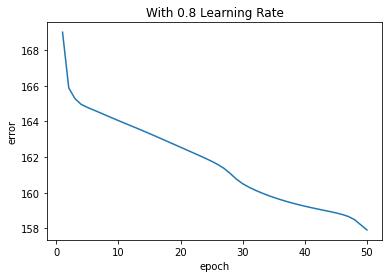

In [ ]:
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

plt.plot(epochs,train1)
  
plt.xlabel('epoch')
plt.ylabel('error')
  
plt.title('With 0.8 Learning Rate')
  
plt.show()